<a href="https://colab.research.google.com/github/ridwanbello/prosper_loan_analysis/blob/exploratory_analysis/Part_I_exploration_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I - (Prosper Loan Dataset Exploration)
## by (Ridwan Oluwaseun Bello)

## Introduction
The dataset to be used in this project is the Prosper Loan Dataset. This is a financial dataset gathered from a company based in San Fransisco. They specialize in granting loans to borrowers at low interest rates. The main aim is to analyse the data using exploratory and explanatory data analysis.


## Preliminary Wrangling


In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [ ]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')

In [ ]:
# high-level overview of data shape and composition
print(loans.shape)

(113937, 81)


In [ ]:
# Check the data types of the columns
print(loans.dtypes)

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [ ]:
# Get sample of the dataset
print(loans.sample(2))

                    ListingKey  ListingNumber            ListingCreationDate  \
70178  C03E3380414166188E6B570          97746  2007-02-11 09:47:44.123000000   
46273  8D0C3530238955853B93AA2         534978  2011-10-23 14:07:59.283000000   

      CreditGrade  Term  LoanStatus           ClosedDate  BorrowerAPR  \
70178          HR    36  Chargedoff  2008-10-20 00:00:00      0.30913   
46273         NaN    36   Completed  2012-06-15 00:00:00      0.20200   

       BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
70178        0.2900       0.2850  ...           -5.51                0.0   
46273        0.1799       0.1699  ...          -14.74                0.0   

       LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
70178                 699.48               699.48   
46273                   0.00                 0.00   

      LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
70178                             0.0            1.0                0   
4627

In [ ]:
# descriptive statistics for numeric variables
print(loans.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [ ]:
# Create a function to get the number of each data type in the dataset
def getDtypeNumber(df, dtype):
    return sum(df.dtypes == dtype)

In [ ]:
print(f' Number of Floating variables = {getDtypeNumber(loans, "float64")} ')
print(f' Number of String/Object variables = {getDtypeNumber(loans, "object")} ')
print(f' Number of Integer variables = {getDtypeNumber(loans, "int64")} ')
print(f' Number of Boolean variables = {getDtypeNumber(loans, "bool")} ')

 Number of Floating variables = 50 
 Number of String/Object variables = 17 
 Number of Integer variables = 11 
 Number of Boolean variables = 3 


### What is the structure of your dataset?


There are 113, 937 records of loan data in the dataset with 81 features. Most variables are numeric with 50 of them being floating data type and 11 of integer data type. 3 of them are Boolean and 17 of them are strings.

### What is/are the main feature(s) of interest in your dataset?

I am most curious in finding out the most important and significant features that best determines loans that will be paid on time or Completed in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Features to consider include "Term", "LoanStatus", "BorrowerAPR", "BankcardUtilization", "EmploymentStatus", "Occupation", "StatedMonthlyIncome", "BorrowerState", "Recommendations", "DebtToIncomeRatio", "ProsperScore", "OnTimeProsperPayments", "CreditGrade"

In [ ]:
# View the list of columns
loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

Term, LoanStatus, CreditGrade, BorrowerAPR, BankcardUtilization, EstimatedLoss, OnTimeProsperPayments, EmploymentStatus, Occupation, StatedMonthlyIncome, BorrowerState, Recommendations, ProsperScore, DebtToIncomeRatio      

### Data Exploration for Cleaning

In [ ]:
# Create a function to calculate percentage of missing values
def getPercentMissValues(data, column):
    return format(( data[column].isnull().sum() / data.shape[0]) * 100, '.2f')

In [ ]:
featureList = ["Term", "LoanStatus", "BorrowerAPR", "BankcardUtilization", "EmploymentStatus", "Occupation", "StatedMonthlyIncome", "BorrowerState", "Recommendations", "DebtToIncomeRatio", "ProsperScore", "OnTimeProsperPayments", "CreditGrade"] 
resultList = []
for i in featureList:
    resultList.append(getPercentMissValues(loans, i))
resultList

['0.00',
 '0.00',
 '0.02',
 '6.67',
 '1.98',
 '3.15',
 '0.00',
 '4.84',
 '0.00',
 '7.51',
 '25.53',
 '80.62',
 '74.59']

In [ ]:
# Format the result in a nicely formatted table

fmt = '{:<8}{:<30}{}'

print(fmt.format('', 'Features', 'Percentage'))
for i, (features, result) in enumerate(zip(featureList, resultList)):
    print(fmt.format(i, features, result))

        Features                      Percentage
0       Term                          0.00
1       LoanStatus                    0.00
2       BorrowerAPR                   0.02
3       BankcardUtilization           6.67
4       EmploymentStatus              1.98
5       Occupation                    3.15
6       StatedMonthlyIncome           0.00
7       BorrowerState                 4.84
8       Recommendations               0.00
9       DebtToIncomeRatio             7.51
10      ProsperScore                  25.53
11      OnTimeProsperPayments         80.62
12      CreditGrade                   74.59


In [ ]:
loans["EmploymentStatus"].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [ ]:
loans["Occupation"].value_counts()

Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical           

In [ ]:
loans["BorrowerState"].value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

In [ ]:
loans["ProsperScore"].value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

It can be observed that there are missing values in the features of interest which needs to be cleaned before moving to exploration. Therefore, the data cleaning process that will be applied in this section includes:

1. Replacing the missing .02% in BorrowerAPR column with the mean of the borrower_fees since borrower_fees = borrowerAPR - borrowerRate.
2. Replacing the missing values of the EmploymentStatus with the most frequent value in the Series
3. Replacing the missing values in Occupation with "Others" most values contain "Others"
4. Replacing the missing values in BorrowerState with "CA" most values contain "CA"
5. Replacing the missing values in DebtToIncomeRatio with the result of dividing the MonthlyLoanPayment by the StatedMonthlyIncome and adding 1 to rows with income of 0 to avoid errors
6. Dropping rows with null values in the ProsperScore column
7. Discarding the OnTimeProsperPayments and CreditGrade columns since they have over 74% of missing values

### Data Cleaning

In [ ]:
# Replacing the missing .02% in BorrowerAPR column with the mean of the borrower_fees since borrower_fees = borrowerAPR - borrowerRate
borrower_fees = loans["BorrowerAPR"] - loans["BorrowerRate"]
borrower_fees.median()

0.025019999999999987

In [ ]:
loans["BorrowerAPR"].fillna(loans["BorrowerRate"] + borrower_fees.median(), inplace=True)

loans["BorrowerAPR"].isnull().sum()

0

In [ ]:
loans["BankcardUtilization"].fillna(loans["BankcardUtilization"].median(), inplace=True)

loans["BankcardUtilization"].isnull().sum()


0

In [ ]:
loans["EmploymentStatus"].fillna(loans["EmploymentStatus"].mode().iloc[0], inplace=True)

loans["EmploymentStatus"].isnull().sum()

0

In [ ]:
loans["Occupation"].fillna(loans["Occupation"].mode().iloc[0], inplace=True)

loans["Occupation"].isnull().sum()

0

In [ ]:
loans["BorrowerState"].fillna(loans["BorrowerState"].mode().iloc[0], inplace=True)

loans["BorrowerState"].isnull().sum()

0

In [ ]:
loans["DebtToIncomeRatio"].fillna(loans["MonthlyLoanPayment"] / (loans["StatedMonthlyIncome"] + 1), inplace = True)

loans["DebtToIncomeRatio"].isnull().sum()

0

In [ ]:
# Dropping null rows in ProsperScore
loans.dropna(subset=['ProsperScore'], inplace=True)

loans["ProsperScore"].isnull().sum()

0

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 81 columns):
ListingKey                             84853 non-null object
ListingNumber                          84853 non-null int64
ListingCreationDate                    84853 non-null object
CreditGrade                            0 non-null object
Term                                   84853 non-null int64
LoanStatus                             84853 non-null object
ClosedDate                             26005 non-null object
BorrowerAPR                            84853 non-null float64
BorrowerRate                           84853 non-null float64
LenderYield                            84853 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha)              

Test

In [ ]:
loans[["Term", "LoanStatus", "BorrowerAPR", "BankcardUtilization", "EmploymentStatus", "Occupation", "StatedMonthlyIncome", "BorrowerState", "Recommendations", "DebtToIncomeRatio", "ProsperScore"]].isnull().sum()

Term                   0
LoanStatus             0
BorrowerAPR            0
BankcardUtilization    0
EmploymentStatus       0
Occupation             0
StatedMonthlyIncome    0
BorrowerState          0
Recommendations        0
DebtToIncomeRatio      0
ProsperScore           0
dtype: int64

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: LoanStatus.

[Text(0,0,'Current'),
 Text(0,0,'Past Due (1-15 days)'),
 Text(0,0,'Defaulted'),
 Text(0,0,'Completed'),
 Text(0,0,'Chargedoff'),
 Text(0,0,'Past Due (16-30 days)'),
 Text(0,0,'Past Due (61-90 days)'),
 Text(0,0,'Past Due (31-60 days)'),
 Text(0,0,'Past Due (91-120 days)'),
 Text(0,0,'FinalPaymentInProgress'),
 Text(0,0,'Past Due (>120 days)')]

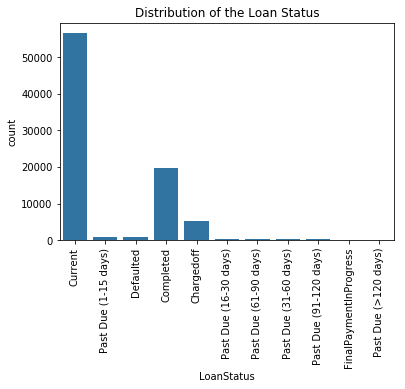

In [ ]:
default_color = sb.color_palette()[0]
ax = sb.countplot(data = loans, x = 'LoanStatus', color = default_color)
ax.set_title("Distribution of the Loan Status")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [ ]:
loans["LoanStatus"].unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [ ]:
# There is a long tail in the distribution so lets replace columns related to default with "defaulted"
loans["LoanStatus"].replace(dict.fromkeys(['Chargedoff','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'], 'Defaulted'), inplace=True)
# Also replacing column similar to completion to "Completed"
loans["LoanStatus"].replace(dict.fromkeys(['FinalPaymentInProgress','Cancelled'], 'Completed'), inplace=True)

In [ ]:
loans["LoanStatus"].unique()

array(['Current', 'Defaulted', 'Completed'], dtype=object)

Text(0.5,1,'Distribution of the Loan Status')

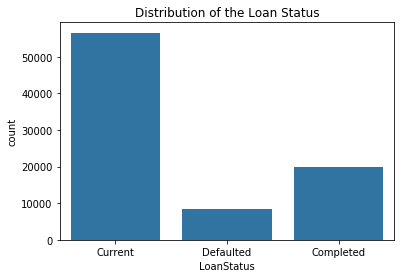

In [ ]:
default_color = sb.color_palette()[0]
ax = sb.countplot(data = loans, x = 'LoanStatus', color = default_color)
ax.set_title("Distribution of the Loan Status")

When plotted with three variables, ongoing status seems to be the highest followed by Completed

Next up, the first predictor variable of interest: Term.

Text(0.5,1,'Distribution of the Loan Term (in months)')

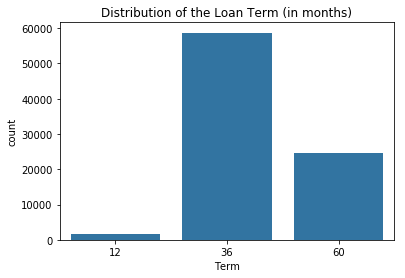

In [ ]:
default_color = sb.color_palette()[0]
ax = sb.countplot(data = loans, x = 'Term', color = default_color)
ax.set_title("Distribution of the Loan Term (in months)")

In [ ]:
#Convert the months to year
loans['Term_year'] = round(loans['Term'] / 12)

In [ ]:
loans['Term_year'].unique()

array([ 3.,  5.,  1.])

Text(0.5,1,'Distribution of the Loan Term (in year)')

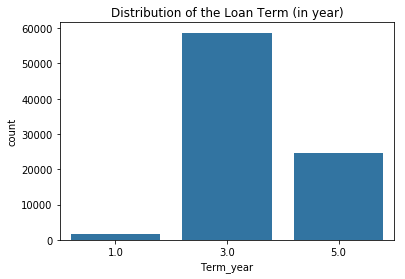

In [ ]:
default_color = sb.color_palette()[0]
ax = sb.countplot(data = loans, x = 'Term_year', color = default_color)
ax.set_title("Distribution of the Loan Term (in year)")

The month was converted to year for easy interpretation. According to the chart, most borrowers loaned for 3 years

Next, we will look at the second variable of interest, BorrowerAPR

In [ ]:
loans['BorrowerAPR'].describe()

count    84853.000000
mean         0.226658
std          0.079916
min          0.045830
25%          0.163280
50%          0.219450
75%          0.292540
max          0.423950
Name: BorrowerAPR, dtype: float64

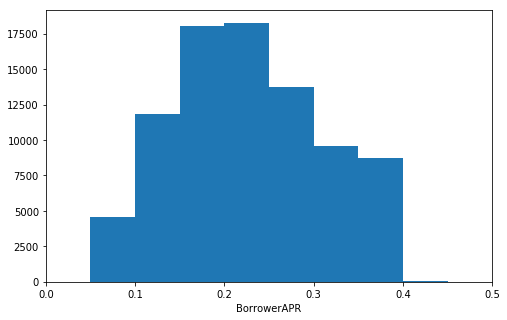

In [ ]:
binsize = 0.05
bins = np.arange(0, loans['BorrowerAPR'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BorrowerAPR', bins = bins)
plt.xlim([0,0.5])
plt.xlabel('BorrowerAPR')
plt.show()

Most of the data falls between 0.15 and 0.2

Next, we will look at the employment status

Text(0.5,1,'Distribution of the Employment Status')

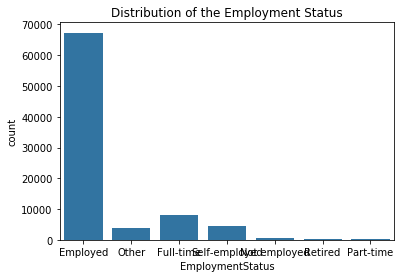

In [ ]:
default_color = sb.color_palette()[0]
ax = sb.countplot(data = loans, x = 'EmploymentStatus', color = default_color)
ax.set_title("Distribution of the Employment Status")

In [ ]:
# Replacing values that are similar to being Employed with Employed
loans["EmploymentStatus"].replace(dict.fromkeys(['Self-employed', 'Full-time', 'Part-time'], 'Employed'), inplace=True)
# Replacing values that are similar to being unemployed with Unemployed
loans["EmploymentStatus"].replace(dict.fromkeys(['Not available', 'Not employed', 'Retired'], 'Unemployed'), inplace=True)

In [ ]:
loans["EmploymentStatus"].unique()

array(['Employed', 'Other', 'Unemployed'], dtype=object)

Text(0.5,1,'Distribution of the Employment Status')

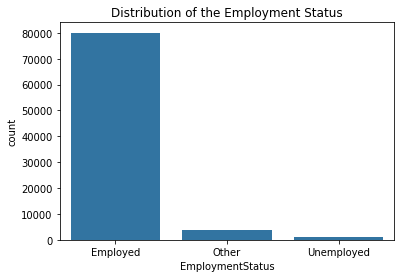

In [ ]:
default_color = sb.color_palette()[0]
ax = sb.countplot(data = loans, x = 'EmploymentStatus', color = default_color)
ax.set_title("Distribution of the Employment Status")

It can be observed that most borrowes are actually employed

Next, we will look at Recommendations received by the borrowers

In [ ]:
loans["Recommendations"].describe()

count    84853.000000
mean         0.017560
std          0.187963
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         19.000000
Name: Recommendations, dtype: float64

Text(0.5,1,'Distribution of the Recommendations')

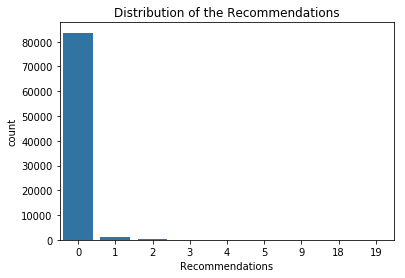

In [ ]:
default_color = sb.color_palette()[0]
ax = sb.countplot(data = loans, x = 'Recommendations', color = default_color)
ax.set_title("Distribution of the Recommendations")

Text(0.5,1,'Distribution of the Recommendations')

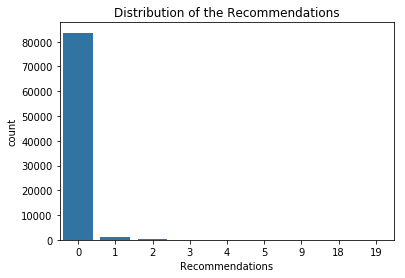

In [ ]:
default_color = sb.color_palette()[0]
ax = sb.countplot(data = loans, x = 'Recommendations', color = default_color)
ax.set_title("Distribution of the Recommendations")

Most borrowers receive no recommendation

Next determining factor is the prosper score

Text(0.5,1,'Distribution of the ProsperScore')

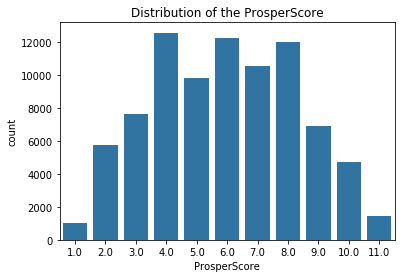

In [ ]:
default_color = sb.color_palette()[0]
ax = sb.countplot(data = loans, x = 'ProsperScore', color = default_color)
ax.set_title("Distribution of the ProsperScore")

In [ ]:
# convert ProsperScore, ProsperRating into ordered categorical types
ordinal_var_dict = {'ProsperScore': [1,2,3,4,5,6,7,8,9,10,11]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

Text(0.5,1,'Distribution of the ProsperScore')

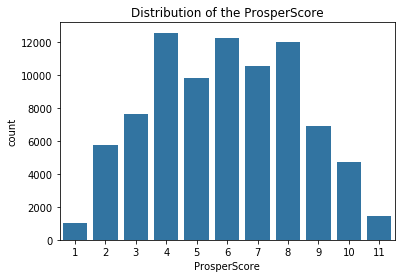

In [ ]:
default_color = sb.color_palette()[0]
ax = sb.countplot(data = loans, x = 'ProsperScore', color = default_color)
ax.set_title("Distribution of the ProsperScore")

The chart is multimodal and most borrowers have properscore rating of 4,6 and 8 respectively

Plotting all six categorical variables

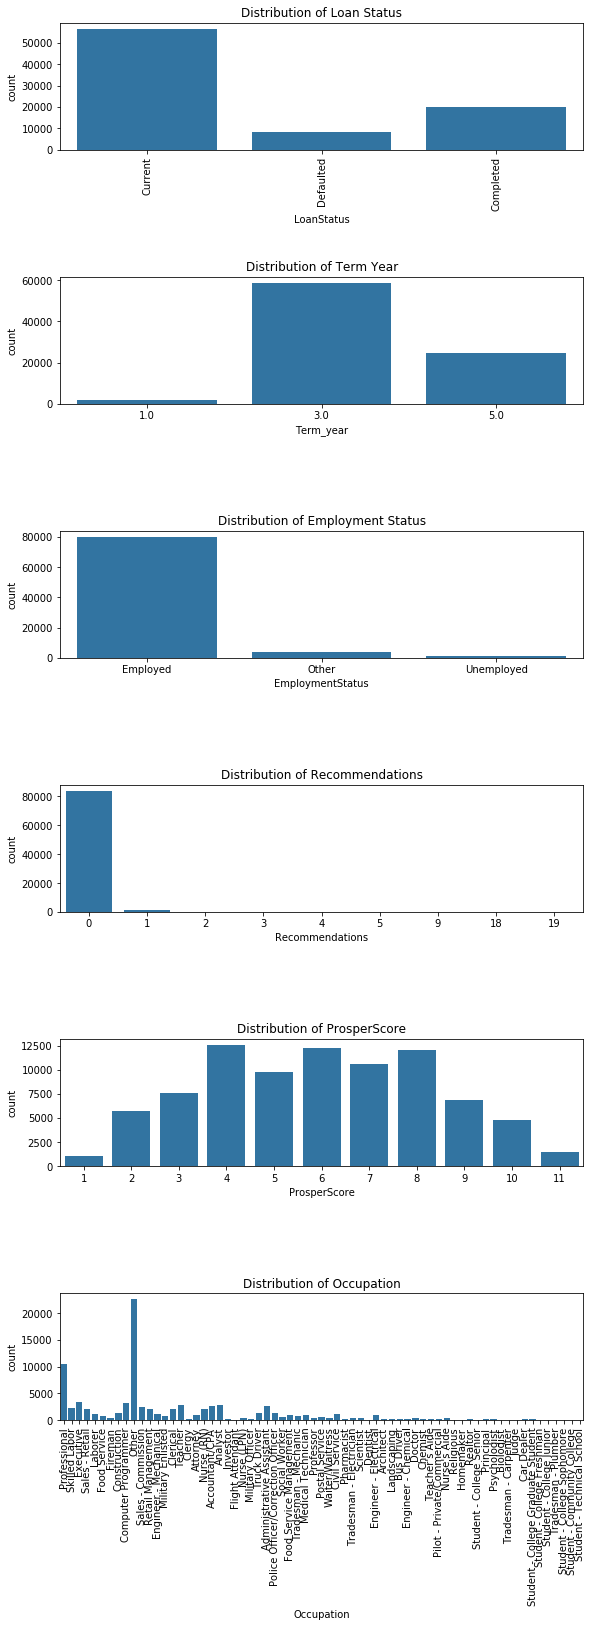

In [ ]:
fig, ax = plt.subplots(nrows=6, figsize = [8,20])
fig.tight_layout()
default_color = sb.color_palette()[0]
sb.countplot(data = loans, x = 'LoanStatus', color = default_color, ax = ax[0])
ax[0].set_title("Distribution of Loan Status")
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
sb.countplot(data = loans, x = 'Term_year', color = default_color, ax = ax[1])
ax[1].set_title("Distribution of Term Year")
sb.countplot(data = loans, x = 'EmploymentStatus', color = default_color, ax = ax[2])
ax[2].set_title("Distribution of Employment Status")
sb.countplot(data = loans, x = 'Recommendations', color = default_color, ax = ax[3])
ax[3].set_title("Distribution of Recommendations")
sb.countplot(data = loans, x = 'ProsperScore', color = default_color, ax = ax[4])
ax[4].set_title("Distribution of ProsperScore")
sb.countplot(data = loans, x = 'Occupation', color = default_color, ax = ax[5])
ax[5].set_title("Distribution of Occupation")
ax[5].set_xticklabels(ax[5].get_xticklabels(),rotation = 90)


fig.subplots_adjust(hspace=1)
plt.show()

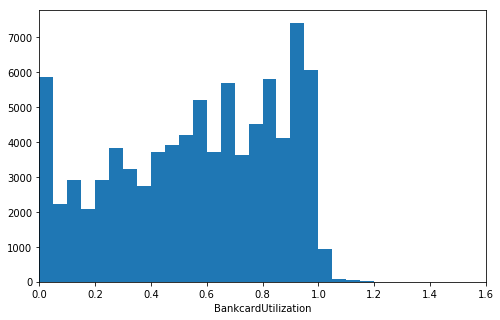

In [ ]:
binsize = 0.05
bins = np.arange(0, loans['BankcardUtilization'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'BankcardUtilization', bins = bins)
plt.xlim([0,1.6])
plt.xlabel('BankcardUtilization')
plt.show() 

The Bankcard utilization has a long tail so the perceived outlier values were removed. From the graph most borrowers use their credit cards quite often

In [ ]:
loans['StatedMonthlyIncome'].describe()

count    8.485300e+04
mean     5.931175e+03
std      8.239944e+03
min      0.000000e+00
25%      3.434000e+03
50%      5.000000e+03
75%      7.083333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [ ]:
loans['StatedMonthlyIncome'].unique()

array([  6125.      ,   2875.      ,   9583.333333, ...,   3430.583333,
         1539.166667,  18756.      ])

[]

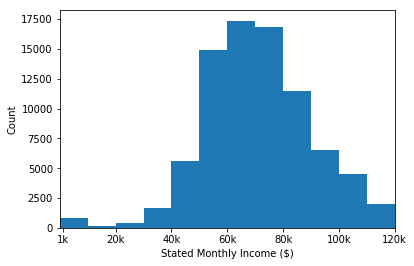

In [ ]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

bin_edges = np.arange(0, sqrt_trans(loans['StatedMonthlyIncome'].max())+10, 10)
plt.hist(loans['StatedMonthlyIncome'].apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(loans['StatedMonthlyIncome'].max())+10, 10)
plt.xlim(0, 100)
plt.xticks([1, 20, 40, 60, 80, 100, 120], ['1k', '20k', '40k', '60k', '80k', '100k', '120k'])
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Count')
plt.plot()

The statedmonthlyincome ranges from 0 to over 120,00 dollars but peaked in the amount between 60,000 and 70,000 dollars which follows a normal distribution curve.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The stated monthly income variable took on a large range of values, so I applied a square root transform to the data. Under the transformation, the data looked like a normal curve, with the peak between 60,000 and 80,000 dollars


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the "LoanStatus" column, I discovered that all "past dues" and "chargedoff" loans may eventually default, I replaced them with "Cancelled". Similarly, the "FinalPaymentInProgress" and "Cancelled" are assumed to be in "Completed". So we are left with three values. "Completed", "Current" and "Defaulted".

> In the "EmploymentStatus" column, I discovered that all "Self-employed", "Part-Time" and "Full-time" can be considered "Employed", I replaced them with "Employed". Similarly, the "Not available", "Not employed" and "Retired" are assumed to be in "Unemployed". So we are left with three values. "Employed", "Unemployed" and "Others".

> There seems to be high outlier (around 1.6 and above) in the BankCardUtilization column, so the numbers were dropped to avoid confusion.

> 



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
# Segmenting the variables of interest into different data types for easy plotting
numeric_vars = ['BorrowerAPR', 'BankcardUtilization', 'StatedMonthlyIncome', 'Recommendations']
categoric_vars = ['Term_year', 'LoanStatus', 'EmploymentStatus', 'ProsperScore']
categoric_vars2 = ['Occupation', 'BorrowerState']

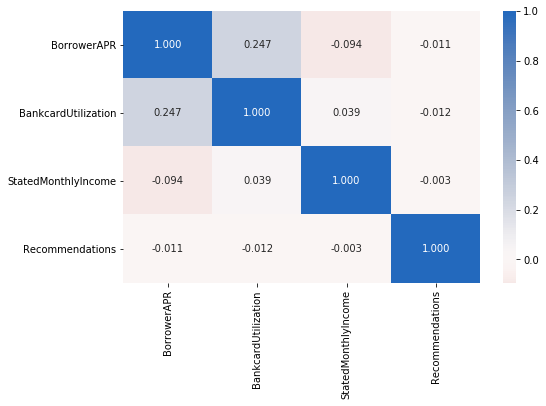

In [ ]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

loans.shape= (84853, 82)
loans_samp.shape= (500, 82)


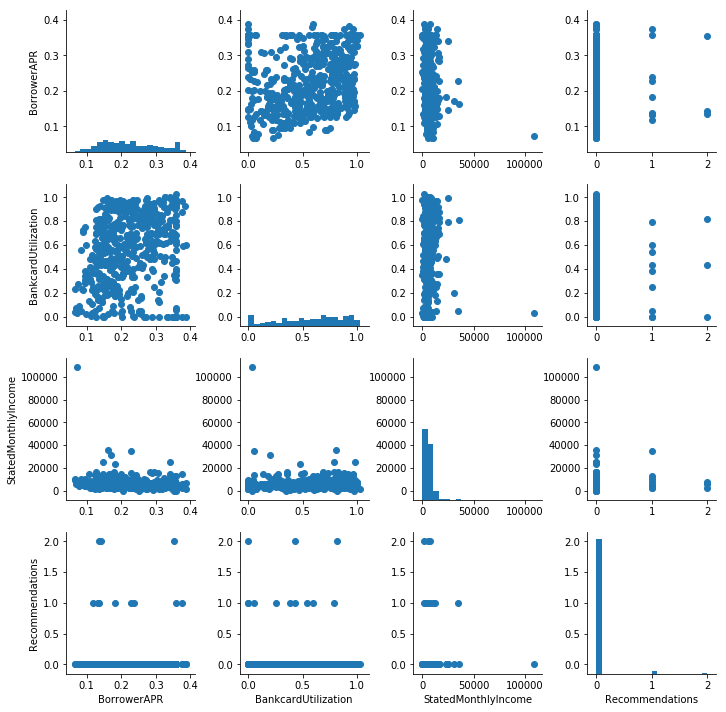

In [ ]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("loans.shape=",loans.shape)
loans_samp = loans.sample(n=500, replace = False)
print("loans_samp.shape=",loans_samp.shape)

g = sb.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

There seems to be a positive correlation between BorrowerAPR and BankUtilization. Also, positive correlation exists between bankCardUtilization and StatedMonthlyIncome. These three variables will be investigated further in this section as against the loan Status.

Surprisingly, there is a negative correlation between StatedMonthlyIncome and Recommendation just like there is a negative correlation between Recommendations and BankCardUtilization


Lets take a look at the categorical variables

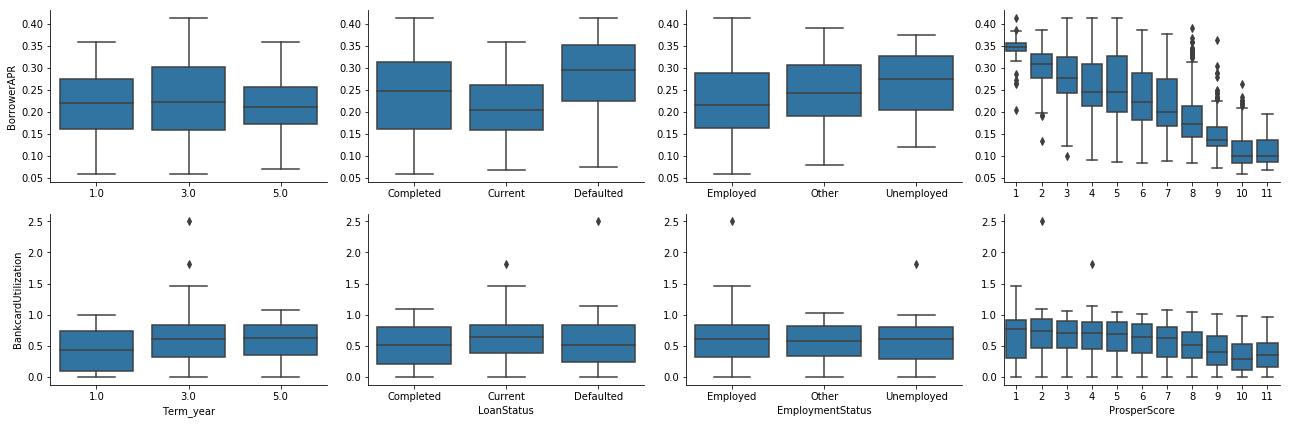

In [ ]:
#Get a subset of the data for faster computation
loans_samp = loans.sample(n=5000, replace = False)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 15])
g = sb.PairGrid(data = loans_samp, y_vars = ['BorrowerAPR', 'BankcardUtilization'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

From the chart above, it can be deduced that the higher the BorrowerAPR the lower the ProperScore which means the less risky the loan transaction. Concerning the Loan Status, the borrowers with higher BorrowerAPR tends to default the most.

It turns out that borrowers with loan term of 3 years tend to use credit card mostly. Also, employed borrowers use credit card more than unemployed and others which actually makes sense.

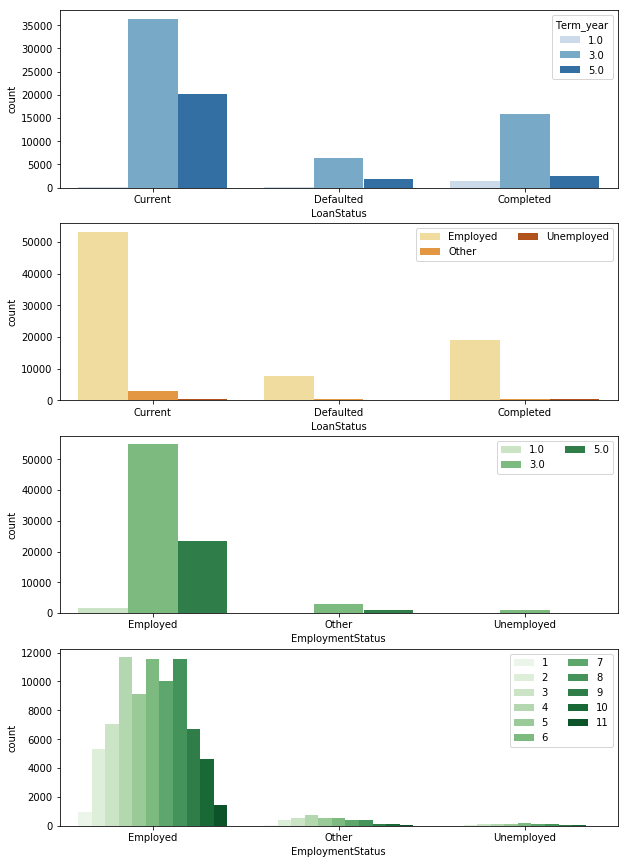

In [ ]:
plt.figure(figsize = [10, 15])

# subplot 1: LoanStatus vs Term_year
plt.subplot(4, 1, 1)
sb.countplot(data = loans, x = 'LoanStatus', hue = 'Term_year', palette = 'Blues')

# subplot 2: LoanStatus vs. EmploymentStatus
ax = plt.subplot(4, 1, 2)
sb.countplot(data = loans, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'YlOrBr')
ax.legend(ncol = 2) 

# subplot 3: EmploymentStatus vs. Term_year
ax = plt.subplot(4, 1, 3)
sb.countplot(data = loans, x = 'EmploymentStatus', hue = 'Term_year', palette = 'Greens')
ax.legend(loc = 1, ncol = 2)

# subplot 3: EmploymentStatus vs. Term_year
ax = plt.subplot(4, 1, 4)
sb.countplot(data = loans, x = 'EmploymentStatus', hue = 'ProsperScore', palette = 'Greens')
ax.legend(loc = 1, ncol = 2)

fig.subplots_adjust(hspace=3)
plt.show()

There seems to be a positive correlation between BorrowerAPR and BankUtilization. Also, positive correlation exists between bankCardUtilization and StatedMonthlyIncome. These three variables will be investigated further in this section as against the loan Status. Surprisingly, there is a negative correlation between StatedMonthlyIncome and Recommendation just like there is a negative correlation between Recommendations and BankCardUtilization


There are more borrowers with 3-year loan than 1 or 5-year loans which means people prefer a 3-year loan. Also a 3-year loan will likely be completed than other duration.


Also, employed borrower tends to complete their loan more than those that are unemployed.

There seems to be more of a balanced chart across all three employment statuses and the term year.

The EmploymentStatus follows a multmodal distribution.


Text(0.5,1,'A chart showing the LoanStatus against the ProperScore')

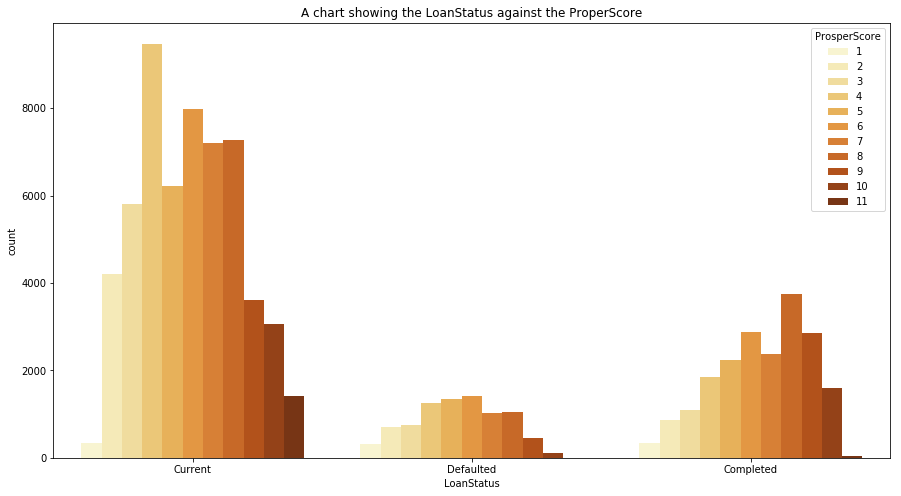

In [ ]:
plt.figure(figsize=(15,8))
sb.countplot(x="LoanStatus", hue="ProsperScore", data=loans, palette = 'YlOrBr')
plt.title("A chart showing the LoanStatus against the ProperScore")

The prosper score follows what looks like a normal distribution against the defaulted loans

Let us take a look at the statedmonthlyincome against the loan status

Text(0.5,1,'A chart showing the StatedMonthlyIncome against the LoanStatus')

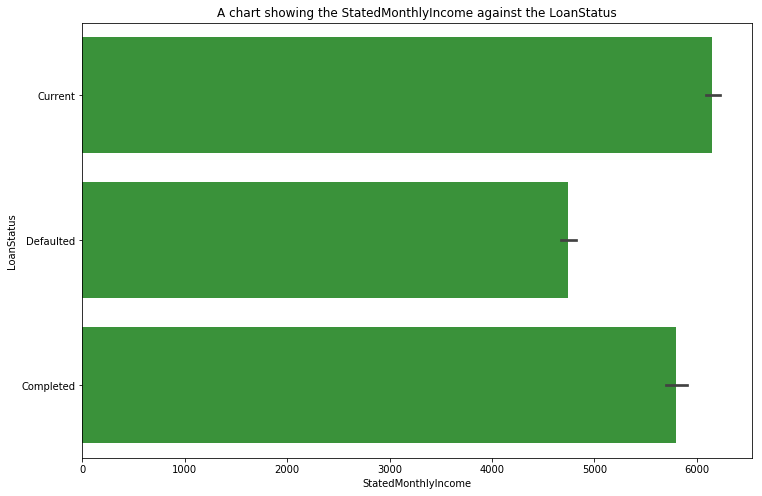

In [ ]:
plt.figure(figsize=(12,8))
base_color = sb.color_palette()[2]
sb.barplot(x="StatedMonthlyIncome", y="LoanStatus", data=loans, color=base_color, orient="h")
plt.title("A chart showing the StatedMonthlyIncome against the LoanStatus")

It can be deduced that the higher the statedmonthlyincome, the lower the defaulted loans which means statedmonthlyincome can be a strong factor

Lets look at the loan status against the numeric variables

[]

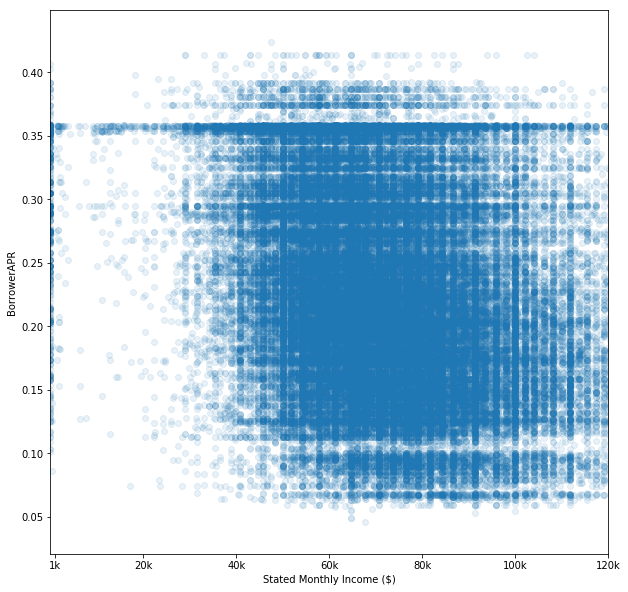

In [ ]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2
    
loans['StatedMonthlyIncome_sqrt'] = loans['StatedMonthlyIncome'].apply(sqrt_trans)

plt.figure(figsize = [10, 10])
plt.scatter(data = loans, x = 'StatedMonthlyIncome_sqrt', y = 'BorrowerAPR', alpha = 1/10)
# tick_locs = np.arange(0, sqrt_trans(loans['StatedMonthlyIncome'].max())+10, 10)
plt.xlim(0, 100)
plt.xticks([1, 20, 40, 60, 80, 100, 120], ['1k', '20k', '40k', '60k', '80k', '100k', '120k'])
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('BorrowerAPR')
plt.plot()


There seems to be positive correlation between the square root transformation of Stated Monthly Income and the Borrower's APR

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> High borrower APR has a strong correlation with the defaulted loans but there is no significance correlation between the bankcardutilization and the Loan Status. Also, there is no clear difference whether the 3 year term loan tend to default their loans more than the 5-year counterpart.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There seems to be a positive correlation between StatedMonthlyIncome and BorrowerAPR. The distribution between employment status and prosperScore follows a Normal distribution curve. Lastly, there is  a positive correlation between the square root transformation of stated monthly income and the BorrowerAPR.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 0.42+.05, .05)
    bins_y = np.arange(0, 1.55+0.5, 0.5)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

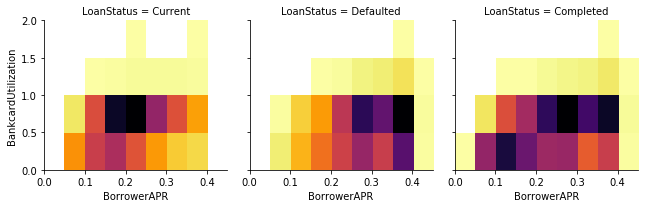

In [ ]:
# create faceted heat maps on LoanStatus, BorrowerAPR and BankcardUtilization
g = sb.FacetGrid(data = loans, col = 'LoanStatus', col_wrap = 4, size = 3, margin_titles = True)
g.map(hist2dgrid, 'BorrowerAPR', 'BankcardUtilization', color = 'inferno_r')
g.set_xlabels('BorrowerAPR')
g.set_ylabels('BankcardUtilization')

plt.show()

In each of the faceted heat maps, the relationship of the current loan status against BankcardUtilization and BorrowerAPR tends to be deeper towards the center of the chart and cloudy towards the upper layer of the chart. For the defaulted loan status, the variables got deeper as the values of the two variables increases while in the Completed loan status, the data seems scattered all over the place.

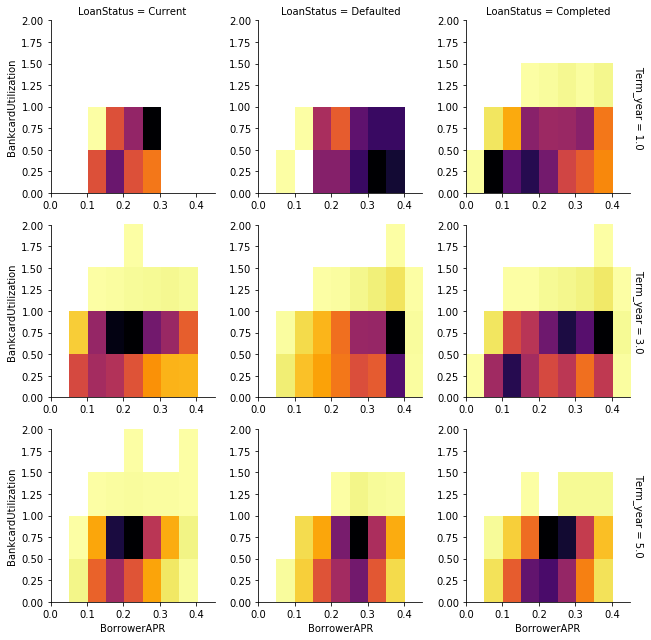

In [ ]:
# create faceted heat maps on levels of LoanStatus, Term_year, BorrowerAPR and BankcardUtilization
g = sb.FacetGrid(data = loans, col = 'LoanStatus', row = 'Term_year', size = 3, margin_titles = True)
g.map(hist2dgrid, 'BorrowerAPR', 'BankcardUtilization', color = 'inferno_r')
g.set_xlabels('BorrowerAPR')
g.set_ylabels('BankcardUtilization')

plt.show()

For the current loan status, the data appears to be deeper towards the center and cloudy towards the upper area of the chart. Also, for the defaulted loan status, the chart appears to be cloudy towards the left area.



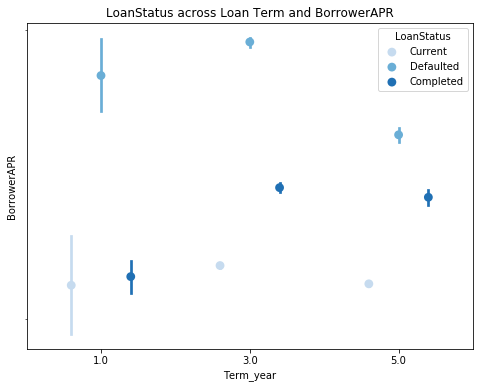

In [ ]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loans, x = 'Term_year', y = 'BorrowerAPR', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('LoanStatus across Loan Term and BorrowerAPR')
plt.ylabel('BorrowerAPR')
plt.yscale('log')
# plt.yticks([10, 30, 100, 300, 300], ['10', '30', '100', '300', '1000'])
ax.set_yticklabels([],minor = True)
plt.show();

A dodged point plot for loans shows the larger error bar for current loan status due to lower borrowerAPR for the loan term of 1 year. Also, the larger error bar in the upper left of the chart shows fewer number of borrowerAPR that have their loans defaulted.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration done here consists of two categorical variables and a numerical variable. There seems to be no significant relationship between the loan term, bank status and the bank utilization card.


### Were there any interesting or surprising interactions between features?

>There seems to be no significant interaction between the two categorical features and the numerical features.

## Conclusions
In the exploration, I found out that most data belongs to the current loan status and most borrowers prefer to loan for the duration of 3 years followed by 2 years and none for less than a year.  ProperScore and BorrowerAPR features contribute significantly to the loan status which means they can be used to determine or predict if a loan will be completed or not. It can also be deduced that the higher the BorrowerAPR the lower the ProperScore which means that the less risky the loan transaction. Concerning the Loan Status, the borrowers with higher BorrowerAPR tends to default the most. Lastly, the relationship between the square-root transfomed StatedMonthlyIncome and BorrowerAPR appears to be linear. 



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

